In [149]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [150]:
TRAIN_DIR = "C:/Users/ASUS/Desktop/Python/new dataset/dataset/train"
TEST_DIR = "C:/Users/ASUS/Desktop/Python/new dataset/dataset/test"
VALID_DIR = "C:/Users/ASUS/Desktop/Python/new dataset/dataset/valid"
BATCH_SIZE=64

In [140]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.png'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 7000 in folder Circle
For training data, found 7000 in folder Square
For training data, found 7000 in folder Star
For training data, found 7000 in folder Triangle


In [141]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.png'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 1000 in folder Circle
For testing data, found 1000 in folder Square
For testing data, found 1000 in folder Star
For testing data, found 1000 in folder Triangle


In [151]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [143]:
class_names = ['Triangle', 'Square', 'Circle', 'Star']

Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)
Image shape (200, 200)


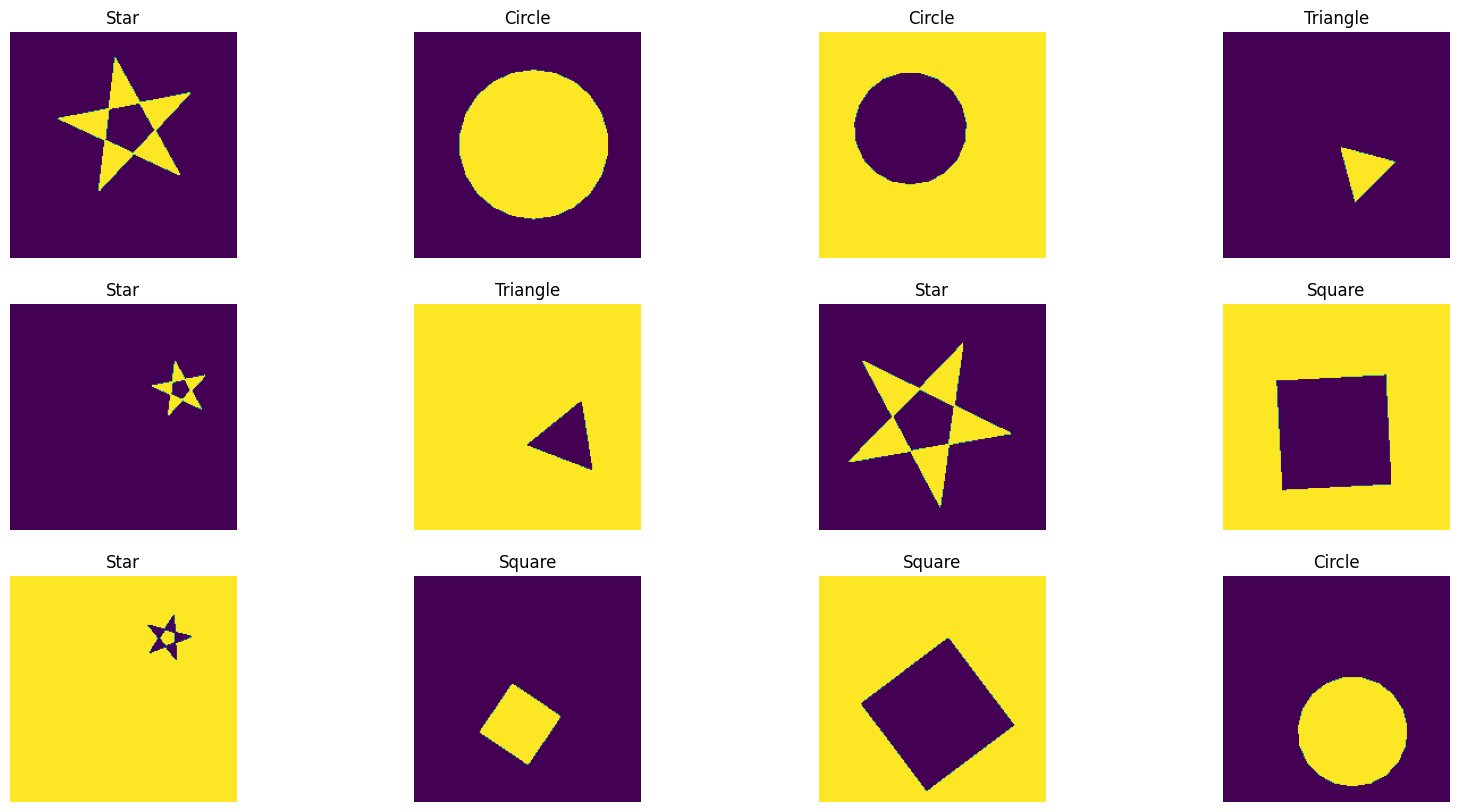

In [130]:
plt.figure(figsize=(20,10))
for i in range(12):
    plt.subplot(3, 4, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir=TEST_DIR+ "/", target_class=class_name)

In [152]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

valid_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,target_size = (128, 128),batch_size = BATCH_SIZE,class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR, target_size = (128, 128), batch_size = BATCH_SIZE, class_mode = 'categorical')

valid_set = valid_datagen.flow_from_directory(VALID_DIR, target_size = (128, 128), batch_size = BATCH_SIZE, class_mode = 'categorical')

Found 28000 images belonging to 4 classes.
Found 4000 images belonging to 4 classes.
Found 8000 images belonging to 4 classes.


In [161]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(48, (3, 3), input_shape = (128, 128, 1), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(48, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 8, activation = 'relu'))

classifier.add(Dense(units = 4, activation = 'softmax'))

# Compiling the CNN

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [163]:
## model summary
classifier.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 126, 126, 48)      480       
                                                                 
 max_pooling2d_69 (MaxPooli  (None, 63, 63, 48)        0         
 ng2D)                                                           
                                                                 
 conv2d_70 (Conv2D)          (None, 61, 61, 48)        20784     
                                                                 
 max_pooling2d_70 (MaxPooli  (None, 30, 30, 48)        0         
 ng2D)                                                           
                                                                 
 conv2d_71 (Conv2D)          (None, 28, 28, 32)        13856     
                                                                 
 max_pooling2d_71 (MaxPooli  (None, 14, 14, 32)      

In [164]:
history = classifier.fit(training_set, epochs = 10,validation_data = valid_set)
classifier.save('model1.h5')

Epoch 1/10
438/438 [==============================] - 368s 836ms/step - loss: 1.2791 - accuracy: 0.3529 - val_loss: 1.1551 - val_accuracy: 0.4319
Epoch 2/10
438/438 [==============================] - 333s 761ms/step - loss: 0.9123 - accuracy: 0.5749 - val_loss: 0.6017 - val_accuracy: 0.7483
Epoch 3/10
438/438 [==============================] - 351s 801ms/step - loss: 0.4817 - accuracy: 0.7967 - val_loss: 0.4138 - val_accuracy: 0.8313
Epoch 4/10
438/438 [==============================] - 328s 749ms/step - loss: 0.3710 - accuracy: 0.8503 - val_loss: 0.3417 - val_accuracy: 0.8639
Epoch 5/10
438/438 [==============================] - 281s 640ms/step - loss: 0.2491 - accuracy: 0.9015 - val_loss: 0.2375 - val_accuracy: 0.9151
Epoch 6/10
438/438 [==============================] - 312s 713ms/step - loss: 0.1863 - accuracy: 0.9305 - val_loss: 0.1824 - val_accuracy: 0.9409
Epoch 7/10
438/438 [==============================] - 350s 799ms/step - loss: 0.1575 - accuracy: 0.9454 - val_loss: 0.1739 -

In [165]:
classifier.evaluate(test_set)

63/63 [==============================] - 11s 177ms/step - loss: 0.1266 - accuracy: 0.9640


[0.12656235694885254, 0.9639999866485596]

Text(0, 0.5, 'Loss')

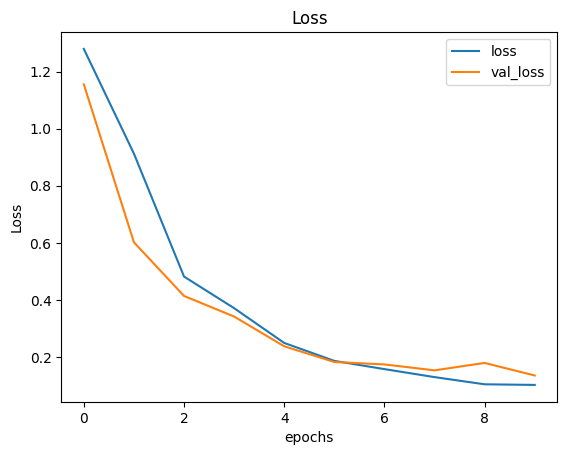

In [166]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

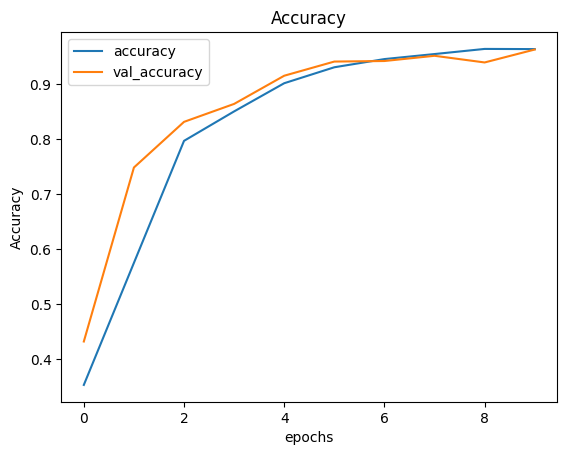

In [167]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')